In [1]:
import pandas as pd
from plot_utils import  *
import numpy as np

%matplotlib widget
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
from scipy.spatial.distance import jensenshannon as JSD 


/home/acevedo/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:

 
train_set = pd.read_csv('../data/experiment_march_21/train_set.csv', header=None) .values
test_set = pd.read_csv('../data/experiment_march_21/test_set.csv', header=None) .values

train_set.shape

(70000, 100)

In [3]:
data_path =  '../data/plot4'

# Histogramas de Especies

## Primero cargamos un dataset de GAN

In [4]:
early_gan_set = pd.read_csv('../data/plot4/3363_0_data/gan_samples_3363_0.csv', header=None) .values

later_gan_set = pd.read_csv('../data/plot4/64226_3_data/gan_samples_64226_3.csv', header=None) .values


## Histograma GAN (Early)-Test Set

1
1
Los datasets del histograma tienen 3363 muestras
JSD(GAN, Test Set) = 0.27441973463607594


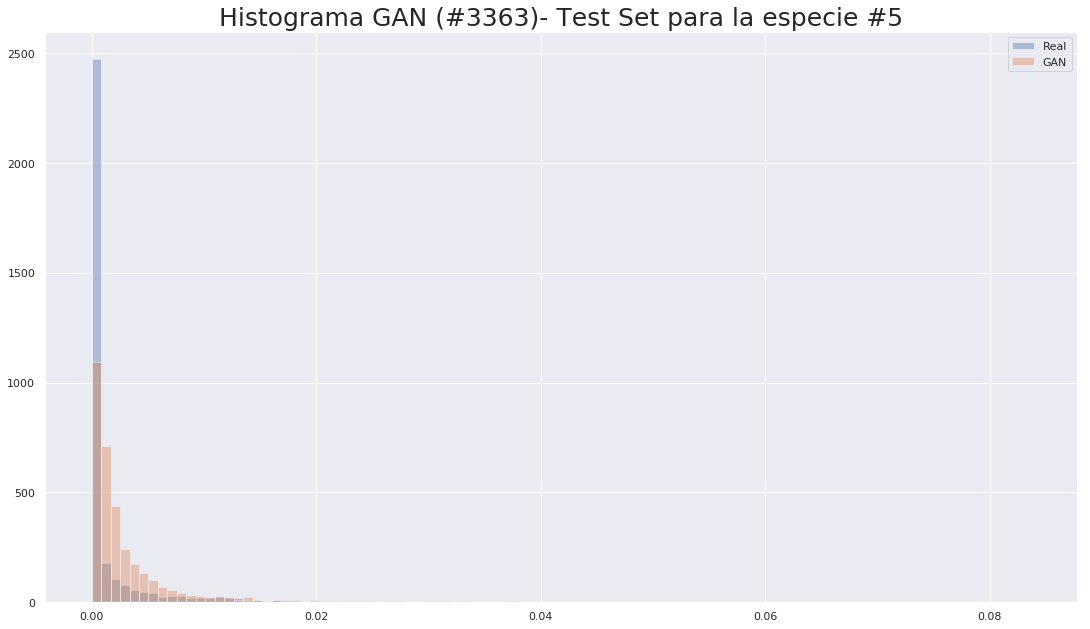

In [5]:
esp = 5

a,b = balance_ds(early_gan_set[:,esp],test_set[:,esp])

print(a.ndim)
print(b.ndim)

plot_abundance_histogram(a,b, esp)


m = str(early_gan_set.shape[0])
plt.title("Histograma GAN (#"+m+")- Test Set para la especie #"+str(esp),fontsize=25)
print("Los datasets del histograma tienen "+str(early_gan_set.shape[0])+" muestras")
print("JSD(GAN, Test Set) = "+str(gan_error(early_gan_set[:,esp],test_set[:,esp], "JSD")))

#plt.xlim(0,0.04)
#plt.ylim(0,1000)

## Histograma GAN (Later)-Test Set

Los datasets del histograma tienen 20000 muestras
JSD(GAN, Test Set) = 0.7245869375866214


(0, 50)

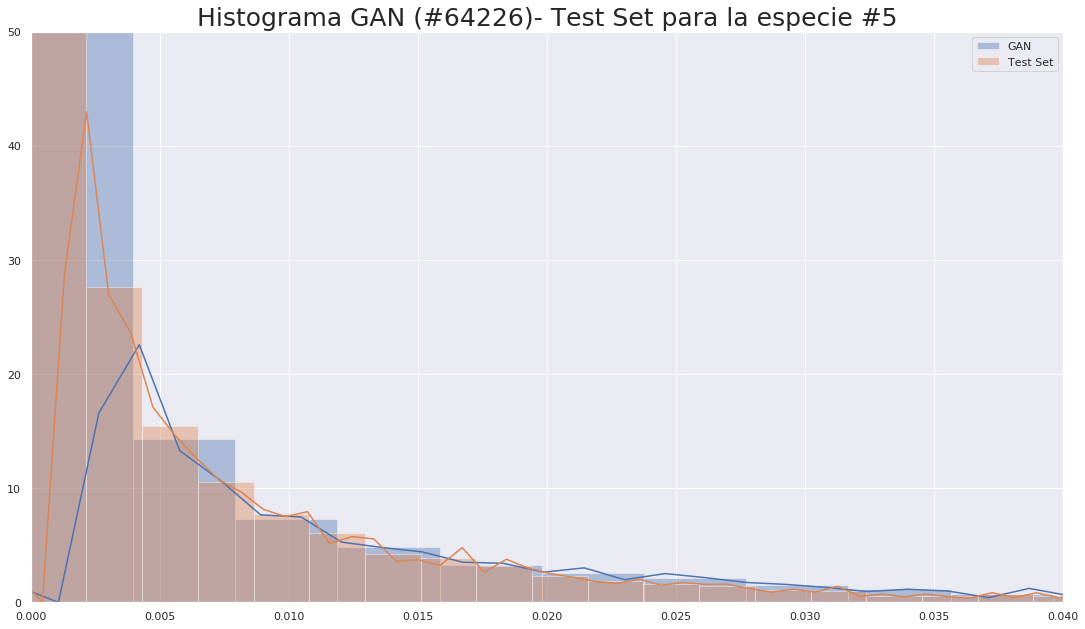

In [6]:
esp = 5

a,b = balance_ds(later_gan_set[:,esp],test_set[:,esp] )

sns.distplot(a, label='GAN')
sns.distplot(b, label ='Test Set')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

m = str(later_gan_set.shape[0])
plt.title("Histograma GAN (#"+m+")- Test Set para la especie #"+str(esp),fontsize=25)
assert a.shape == b.shape
print("Los datasets del histograma tienen "+str(a.shape[0])+" muestras")
print("JSD(GAN, Test Set) = "+str(JSD(a,b)))


plt.xlim(0,0.04)
plt.ylim(0,50)

## Histograma Trainset-Test Set

Los datasets del histograma tienen 20000 muestras
JSD(Train Set, Test Set) = 0.7298855586884624


(0, 50)

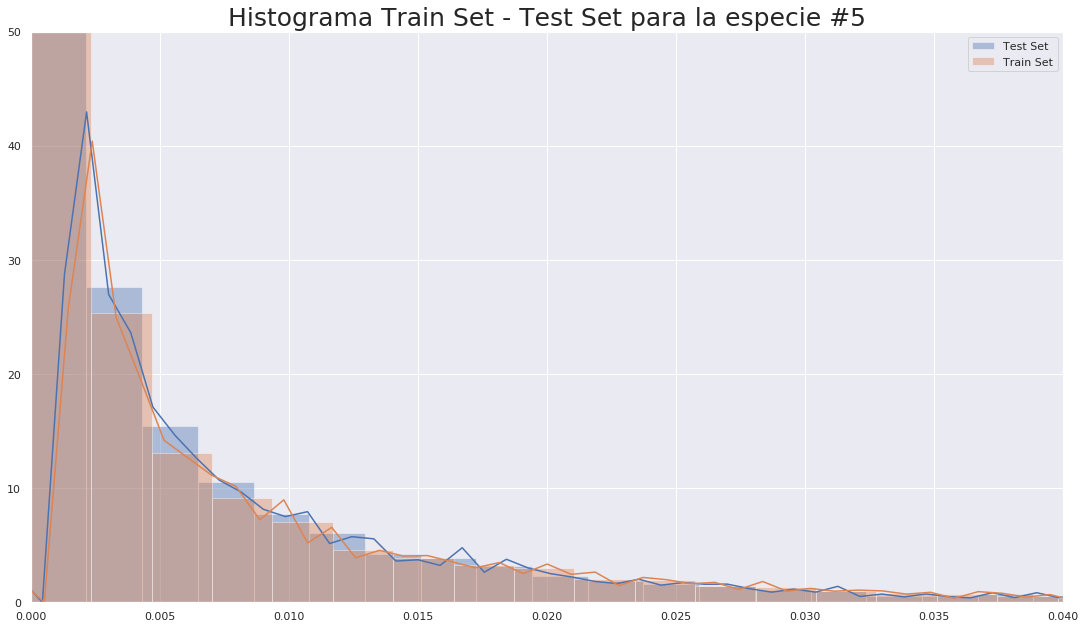

In [8]:
esp = 5


a,b = balance_ds(test_set[:,esp],train_set[:,esp] )

sns.distplot(a, label='Test Set')
sns.distplot(b, label ='Train Set')
plt.legend()


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.title("Histograma Train Set - Test Set para la especie #"+str(esp),fontsize=25)


assert a.shape == b.shape
print("Los datasets del histograma tienen "+str(a.shape[0])+" muestras")
print("JSD(Train Set, Test Set) = "+str(JSD(a,b)))

# lims
plt.xlim(0,0.04)
plt.ylim(0,50)


# Tablas de JSD por subdataset y Graficas

## JSD Score


$$S = e^{\frac{1}{N} \sum_{n=0}^{N}  x}$$
Donde

$$\vec x = {JSD(GAN_k, Testset_k)}$$

In [9]:
tabla_train  = build_table(data_path, train_set)


Table Building progress 0.0%
Table Building progress 10.0%
Table Building progress 20.0%
Table Building progress 30.0%
Table Building progress 40.0%
Table Building progress 50.0%
Table Building progress 60.0%
Table Building progress 70.0%
Table Building progress 80.0%
Table Building progress 90.0%


In [10]:
tabla_test = build_table2(data_path, test_set)


Table Building progress 0.0%
Table Building progress 10.0%
Table Building progress 20.0%
Table Building progress 30.0%
Table Building progress 40.0%
Table Building progress 50.0%
Table Building progress 60.0%
Table Building progress 70.0%
Table Building progress 80.0%
Table Building progress 90.0%


In [11]:
print(train_set.shape)
tabla_train

(70000, 100)


,distance,id_sample_N,id_repetition
0,0.129141,12526,0
1,0.134974,12526,1
2,0.138293,12526,2
3,0.136012,12526,3
4,0.137506,12526,4
5,0.116066,16193,0
6,0.114681,16193,1
7,0.117162,16193,2
8,0.115835,16193,3
9,0.109278,16193,4


In [12]:
print(test_set.shape)
tabla_test

(20000, 100)


,distance,id_sample_N,id_repetition
0,0.129024,12526,0
1,0.134756,12526,1
2,0.138099,12526,2
3,0.135655,12526,3
4,0.137832,12526,4
5,0.116168,16193,0
6,0.113589,16193,1
7,0.117500,16193,2
8,0.114333,16193,3
9,0.108894,16193,4


Standard error of the mean [0.00101091 0.00146704 0.00131523 0.0016637  0.00190155 0.00161611
 0.00222329 0.00248462 0.00089397 0.0013235 ]


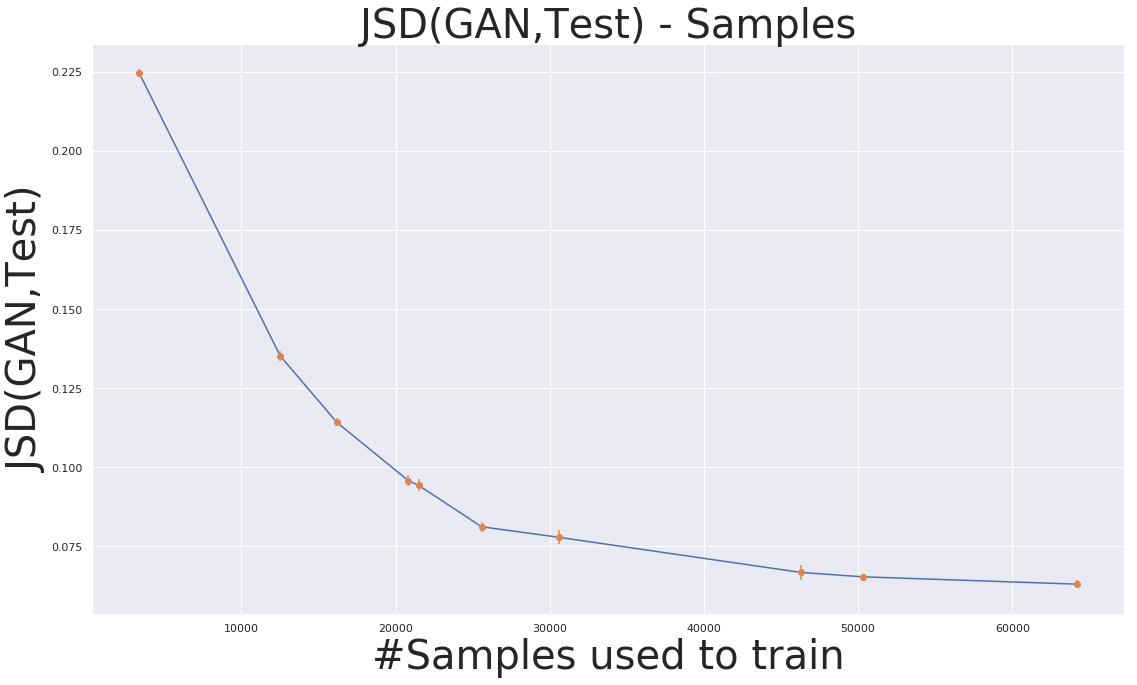

In [16]:
plot_gan_curve(tabla_test, debug_flag= True)
plt.ylabel("JSD(GAN,Test)",fontsize=40)
plt.xlabel("#Samples used to train",fontsize=40)
plt.title("JSD(GAN,Test) - Samples",fontsize=40)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# plt.savefig("curve.png", dpi=300)

Standard error of the mean [0.00169656 0.00144652 0.00124197 0.0015435  0.00202821 0.00156884
 0.00252093 0.00281255 0.00085308 0.00149478]


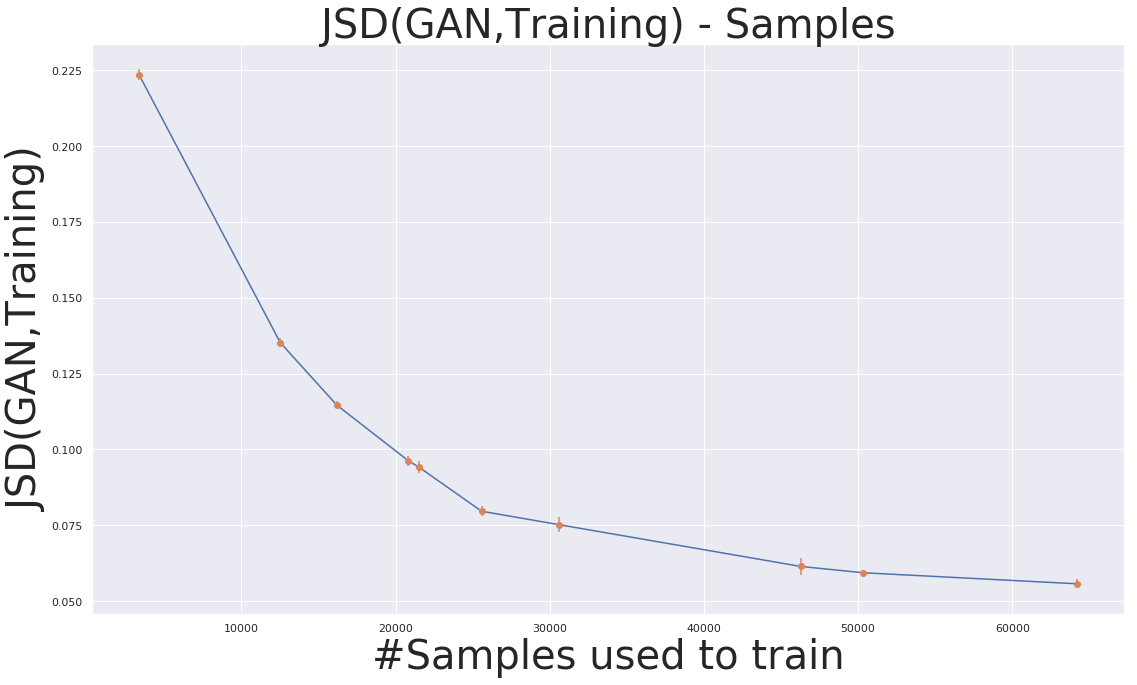

In [14]:
plot_gan_curve(tabla_train, debug_flag=True)
plt.ylabel("JSD(GAN,Training)",fontsize=40)
plt.xlabel("#Samples used to train",fontsize=40)
plt.title("JSD(GAN,Training) - Samples",fontsize=40)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
